# PREDICT AND CLASSIFICATION PRICE STOCKS TO HELP INVESTOR IN DIVERSIFICATION OF PORTOFOLIO

Introduction:
Dalam melakukan investasi, seorang investor harus mempertimbangkan berbagai faktor untuk mengurangi risiko kegagalan. Salah satu cara yang dapat dilakukan untuk mengurangi risiko kegagalan ialah membangun konsep diversifikasi saham. Konsep diversifikasi adalah menyusun portofolio dengan menyertakan berbagai volatilitas saham dengan tujuan untuk mengurangi risiko. Selain itu, aplikasi ini juga dapat memprediksi harga saham di masa yang akan datang



# Import Library
Impor library yang diperlukan

In [1]:
import numpy as np
import os
import pandas as pd
import datetime

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Membaca Data
Data yang diguanakan adalah Dow Jones Index

In [2]:
data = pd.read_csv('dow_jones_index.data')
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


# Preprocessing Data
Menghapus data yang tidak diperlukan dan mengubah tipa data 

In [3]:
# Menghapus field yang tidak terpakai
# data.drop(['percent_change_price', 'percent_change_volume_over_last_wk','previous_weeks_volume', 'next_weeks_open', 'next_weeks_close', 'percent_change_next_weeks_price', 'days_to_next_dividend', 'percent_return_next_dividend'], axis = 1, inplace = True) 
data.drop(['percent_change_volume_over_last_wk','previous_weeks_volume', 'next_weeks_open', 'next_weeks_close', 'days_to_next_dividend', 'percent_return_next_dividend'], axis = 1, inplace = True) 


In [4]:
#Function untuk mengubah object ke dalam bentuk float64
def convert_currency(val):
    new_val = val.replace('.','.').replace('$', '')
    return float(new_val)

In [5]:
# Mengubah data ke float64
data['close'] = data['close'].apply(convert_currency)
data['open'] = data['open'].apply(convert_currency)
data['high'] = data['high'].apply(convert_currency)
data['low'] = data['low'].apply(convert_currency)

In [6]:
# Mengubah date ke dalam bentuk int
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.strftime("%Y%m%d").astype(int)
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_next_weeks_price
0,1,AA,20110107,15.82,16.72,15.78,16.42,239655616,3.79267,-4.428490
1,1,AA,20110114,16.71,16.71,15.64,15.97,242963398,-4.42849,-2.470660
2,1,AA,20110121,16.19,16.38,15.60,15.79,138428495,-2.47066,1.638310
3,1,AA,20110128,15.87,16.63,15.82,16.13,151379173,1.63831,5.933250
4,1,AA,20110204,16.18,17.39,16.18,17.14,154387761,5.93325,0.230814


In [7]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
quarter                            750 non-null int64
stock                              750 non-null object
date                               750 non-null int32
open                               750 non-null float64
high                               750 non-null float64
low                                750 non-null float64
close                              750 non-null float64
volume                             750 non-null int64
percent_change_price               750 non-null float64
percent_change_next_weeks_price    750 non-null float64
dtypes: float64(6), int32(1), int64(2), object(1)
memory usage: 55.8+ KB


# Analisis data dari 1 Company

a. Melakukan analisis data dengan menggunakan 1 Company (misal: menggunakan data company CSCO)

In [8]:
# Menggunakan 1 stock CSCO
stock_name = 'CSCO'
stock_csco = data[data['stock'] == stock_name]
stock_csco.shape

(25, 10)

b. Melakukan pemeriksaan terhadap distribusi data untuk melakukan scaling

In [9]:
# data CSCO
stock_csco.describe()

,quarter,date,open,high,low,close,volume,percent_change_price,percent_change_next_weeks_price
count,25.000000,2.500000e+01,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000
mean,1.520000,2.011037e+07,18.122400,18.448400,17.604000,17.899200,3.586616e+08,-1.178297,-1.033689
std,0.509902,1.706148e+02,1.958254,2.040234,1.834014,1.984095,1.665396e+08,3.949663,4.152548
min,1.000000,2.011011e+07,14.940000,15.280000,14.780000,14.930000,1.547083e+08,-15.422900,-15.422900
25%,1.000000,2.011022e+07,16.880000,16.960000,16.520000,16.880000,2.656873e+08,-2.356270,-2.356270
50%,2.000000,2.011040e+07,17.530000,17.880000,17.000000,17.520000,3.086446e+08,-0.480513,-0.480513
75%,2.000000,2.011051e+07,18.840000,18.950000,18.560000,18.700000,4.121981e+08,0.355450,0.355450
max,2.000000,2.011062e+07,22.110000,22.340000,20.730000,22.050000,1.000362e+09,5.351170,6.157970


c. Menambahkan fitur-fitur baru untuk memahami variasi harga stock dalam 1 minggu dan dari minggu sebelumya, fitur yang ditambahkan ini akan membantu dalam memprediksi harga penutupan saham dengan akurasi terbaik serta membantu model untuk mengklasifikasi volatilitas stock.

In [10]:
# Menampilkan 5 data teratas dari stock tersebut, beserta feature baru yang ditambahkan
stock_csco.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_next_weeks_price
60,1,CSCO,20110107,20.45,21.00,20.38,20.97,303545878,2.542790,1.289400
61,1,CSCO,20110114,20.94,21.23,20.70,21.21,154708263,1.289400,-2.356270
62,1,CSCO,20110121,21.22,21.33,20.50,20.72,193706863,-2.356270,0.431862
63,1,CSCO,20110128,20.84,21.61,20.73,20.93,265687272,0.431862,5.351170
64,1,CSCO,20110204,20.93,22.15,20.71,22.05,236334561,5.351170,-15.422900


dari penambahan 2 feature baru diatas, dibuat representasi distribusinya dengan menggunakan graph:

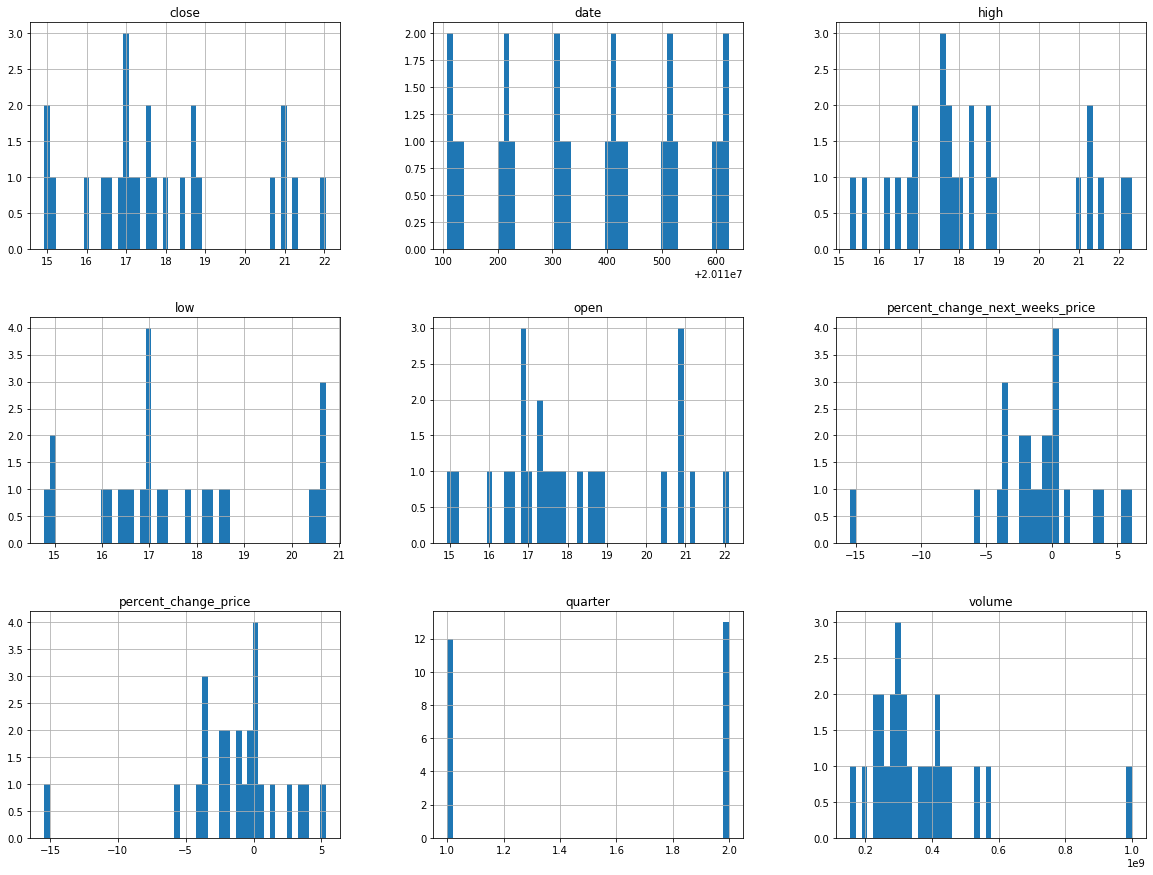

In [11]:
# merepresentasikan distribution pada 1 stock dengan menggunakan graph
stock_csco.hist(bins=50, figsize=(20,15))
plt.show()

d. Merepresentasikan variasi closing price dari sebuah stock CSCO

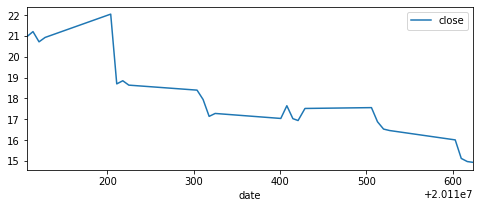

In [12]:
# Plotting variasi close
stock_csco.plot(kind="line", x="date", y="close", figsize=(8, 3))

e. Membangun correlation matrix untuk mengetahui korelasi antara close price (target) dan fitur lainnya

In [13]:
corr_matrix = stock_csco.corr()
corr_matrix['close'].sort_values(ascending=False)

close                              1.000000
low                                0.991721
high                               0.935658
open                               0.914481
percent_change_price               0.279775
volume                            -0.235077
percent_change_next_weeks_price   -0.273878
quarter                           -0.743374
date                              -0.921008
Name: close, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3C8348408>,
      dtype=object)

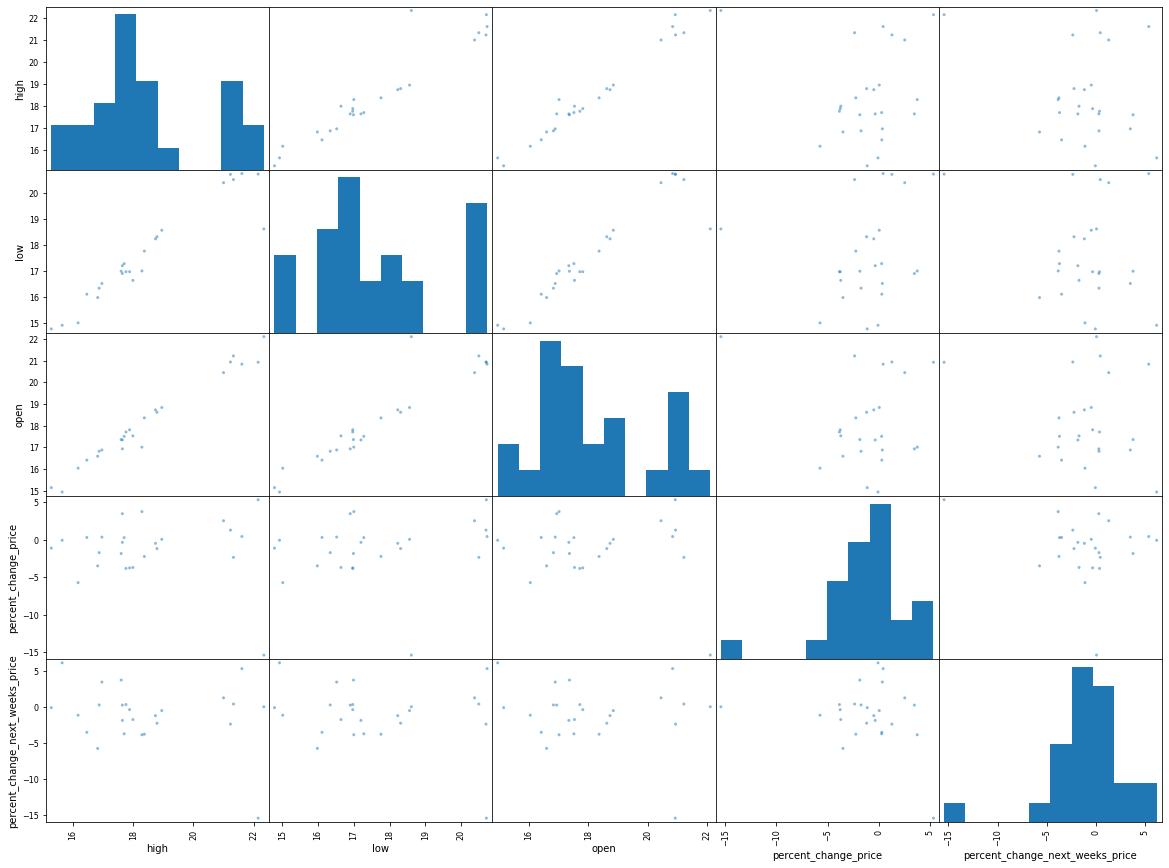

In [14]:
# Lihat representasi setiap atribut 
from pandas.plotting import scatter_matrix

attributes = ["high", "low", "open", "percent_change_price", "percent_change_next_weeks_price"]
scatter_matrix(stock_csco[attributes], figsize=(20, 15))

f. Penggunaan Heatmap untuk feature correlation. Heatmap adalah sebuah peta yang menggambarkan persebaran lokasi dan frekuensi data dalam dengan pewarnaan. Heatmap adalah representasi grafis dari data di mana nilai-nilai individu yang terkandung dalam matriks yang direpresentasikan sebagai warna. 

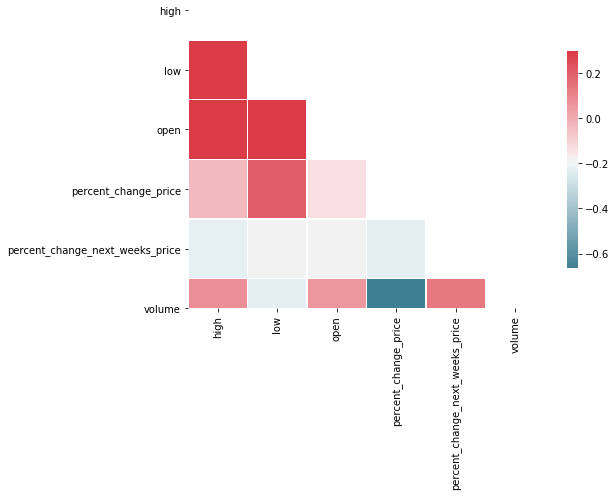

In [15]:
import seaborn as sns

# Korelasi antar variabel pada stock tersebut (CSCO)
corr = stock_csco[["high", "low", "open", "percent_change_price", "percent_change_next_weeks_price", "volume"]].corr()

# generate mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# membuat plot
f, ax = plt.subplots(figsize=(8, 8))

# Atur warna cmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Menampilkan heatmap dengan mask dan ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);


# REGRESSION MODEL untuk training data
Dalam sub bagian ini, akan digunakan data 'close' dan 'date' dari dataset yang sudah diubah ke dalam bentuk int pada tahap sebelumnya. Hal ini dikarenakan regression hanya dapat memprediksi jenis data numerik. Juga, menghapus fitur target yang dekat dari fitur input dan menambahkan fitur target untuk mengukur akurasi prediksi. 

Jadi, ada data dependent dan independent yang digunakan. Data y_stock_axp (dependent) adalah data close sedangkan data X_stock_axp(independent) adalah data 'date'. Hal ini dikarenakan, stock sangat bergantung pada tanggal.

In [16]:
# Masih memanfaatkan data CSCO, membagi data ke dalam train dan test. Data test yang digunakan sebesar 20% dan 
# data train sebesar 80%

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer

X_stock_csco = np.array(stock_csco['date']).reshape(-1,1)
y_stock_csco = np.array(stock_csco['close'])

X_stock_train, X_stock_test, y_stock_train, y_stock_test = train_test_split(
    X_stock_csco, y_stock_csco, test_size=0.2, random_state=42)

# Data Pipeline
Dalam tahap ini, dilakukan preprocessing kembali dalam bentuk pipeline. Untuk mengatasi missing value akan digunakan metode median. Selain itu, dilakukan juga proses scaling data dengan menggunakan StandardScaler() yang membuat tiap fitur memiliki nilai rata-rata 0 dan variansi 1. 

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer,StandardScaler
data_pipeline = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")),
        ('scaler',StandardScaler())
    ])

C:\Users\Arby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Normalisasi data
Tujuan dari normalisasi data adalah untuk menghilangkan dan mengurangi redudansi data dan tujuan yang kedua adalah memastikan dependensi data. Selain itu, hasil dari normalisasi data yang dilakukan akan dieksekusi ke dalam linear regression.

In [18]:
# Dengan menggunakan metode normalization

from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,Normalizer

from sklearn.pipeline import Pipeline

Lr_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")),
        ('normalizer',Normalizer()),
        ('lr', LinearRegression())
        
    ])

Lr_pipeline_nor.fit(X_stock_train, y_stock_train)

C:\Users\Arby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
         steps=[('imputer',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='median', verbose=0)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [19]:
# Dengan metode standarization

from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Lr_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")),
        ('scaler',StandardScaler()),
        ('lr', LinearRegression())
        
    ])

Lr_pipeline_std.fit(X_stock_train, y_stock_train)

C:\Users\Arby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
         steps=[('imputer',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='median', verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

# Penentuan Model
Untuk menentukan model yang digunakan, kami melakukan evaluasi dengan menggunakan MSE, RMSE, dan MAE.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=11)

#data ditransform
X_train = poly.fit_transform(X_stock_train)
X_test = poly.fit_transform(X_stock_test)

from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_stock_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Pada tahap ini, kami melakukan perhitungan MAE untuk perhitungan error tiap model. Ada 3 model yang kami uji, diantaranya:
Polynomial Regression, Linear Regression (menggunakan normalisation dan menggunakan standardisation).

In [21]:
# MAE untuk memahami metrik 
# perhitungan error untuk tiap model

from sklearn.metrics import mean_absolute_error

# Poly
poly_predict = lr.predict(X_test)
poly_mae = mean_absolute_error(y_stock_test, poly_predict)
print('Polynomial Regression MAE', poly_mae)

#Linear Regression with normalisation and standardisation
lr_stock_predictions_nor = Lr_pipeline_nor.predict(X_stock_test)
lr_mae_nor = mean_absolute_error(y_stock_test, lr_stock_predictions_nor)
print('Linear Regression MAE with Normalization', lr_mae_nor)

lr_stock_predictions_std = Lr_pipeline_std.predict(X_stock_test)
lr_mae_std = mean_absolute_error(y_stock_test, lr_stock_predictions_std)
print('Linear Regression MAE with standardization', lr_mae_std)

Polynomial Regression MAE 2.428
Linear Regression MAE with Normalization 1.5033999999999996
Linear Regression MAE with standardization 0.43028953090455035


Pada tahap ini, kami melakukan perhitungan RMSE untuk perhitungan akurasi tiap model. Ada 3 model yang kami uji, diantaranya:
Polynomial Regression, Linear Regression (menggunakan normalisation dan menggunakan standardisation).

In [22]:
# RMSE untuk pengukuran actual accuracy dari model

from sklearn.metrics import mean_squared_error

poly_predict = lr.predict(X_test)
poly_rmse = mean_squared_error(y_stock_test, poly_predict)
rmse = np.sqrt(poly_rmse)
print('Polynomial Regression RMSE', rmse)


# #Linear Regression with normalisation
lr_stock_predictions_nor = Lr_pipeline_nor.predict(X_stock_test)
lr_mse_nor = mean_squared_error(y_stock_test, lr_stock_predictions_nor)
lr_rmse_nor = np.sqrt(lr_mse_nor)
print('Linear Regression RMSE with Normalization', lr_rmse_nor)

# # Linear Regression with standardisation
lr_stock_predictions_std = Lr_pipeline_std.predict(X_stock_test)
lr_mse_std = mean_squared_error(y_stock_test, lr_stock_predictions_std)
lr_rmse_std = np.sqrt(lr_mse_std)
print('Linear Regression RMSE with standardization', lr_rmse_std)

Polynomial Regression RMSE 2.449922447752173
Linear Regression RMSE with Normalization 1.9391897792634936
Linear Regression RMSE with standardization 0.5506071086110176


Pada tahap ini, kami melakukan perhitungan MSE untuk perhitungan akurasi tiap model. Ada 3 model yang kami uji, diantaranya:
Polynomial Regression, Linear Regression (menggunakan normalisation dan menggunakan standardisation).

In [23]:
# MSE 

from sklearn.metrics import mean_squared_error

# Poly
poly_predict = lr.predict(X_test)
poly_mse = mean_squared_error(y_stock_test, poly_predict)
print('Polynomial Regression MSE', poly_mae)

#Linear Regression with normalisation and standardisation
lr_stock_predictions_nor = Lr_pipeline_nor.predict(X_stock_test)
lr_mse_nor = mean_squared_error(y_stock_test, lr_stock_predictions_nor)
print('Linear Regression MSE with Normalization', lr_mae_nor)

lr_stock_predictions_std = Lr_pipeline_std.predict(X_stock_test)
lr_mse_std = mean_squared_error(y_stock_test, lr_stock_predictions_std)
print('Linear Regression MSE with standardization', lr_mae_std)


Polynomial Regression MSE 2.428
Linear Regression MSE with Normalization 1.5033999999999996
Linear Regression MSE with standardization 0.43028953090455035


Hasil RMSE, MAE, dan MSE dari tiap model

In [24]:
# Hasil RMSE dan MAE ditampung dalam dataframe

lr_std = ['1',"Linear Regression with standardisation",np.round(lr_rmse_std,3),np.round(lr_mae_std,3), np.round(lr_mse_std,3)]
lr_nor = ['2',"Linear Regression with normalisation",np.round(lr_rmse_nor,3),np.round(lr_mae_nor,3), np.round(lr_mse_nor,3)]
poly_error = ['3', "Polynomial Regression", np.round(poly_rmse, 3), np.round(poly_mae, 3), np.round(poly_mse,3)]

linear_model_result= pd.DataFrame([lr_std,lr_nor, poly_error],columns=[ "ID", "Model", "RMSE","MAE", "MSE"])
linear_model_result

,ID,Model,RMSE,MAE,MSE
0,1,Linear Regression with standardisation,0.551,0.430,0.303
1,2,Linear Regression with normalisation,1.939,1.503,3.760
2,3,Polynomial Regression,6.002,2.428,6.002


Dari hasil perhitungan error RMSE, MAE, dan MSE diatas, dapat disimpulkan bahwa model Linear Regression dengan Standarization lebih bagus daripada menggunakan 2 metode lainnya dikarenakan metode Standarization memiliki akurasi lebih besar.

# Melakukan Prediksi closing price saham (Semua Stock)
Dari langkah yang dilakukan pada contoh 1 stock CSCO, dilakukan pengembangan untuk semua stock. Klasifikasi label dilakukan dengan menggunakan model linear regression dengan metode standarization (karena menghasilkan nilai yang baik). Klasifikasi label dihitung berdasarkan rata-rata dari stock tersebut. Pada model linear regression dilakukan juga perhitungan koefisien yang akan disimpan bersama dengan label dalam satu csv. Csv ini akan digunakan sebagai dataset berlabel untuk prediksi klasifikasi KNN dan digunakan untuk KMeans sebagai prediksi clustering agar data lebih akurat. 

Data csv ini juga yang akan digunakan untuk memprediksi saham kedepannya dengan menggunakan linear model

In [25]:
from sklearn.preprocessing import Imputer
    
def allModelsResultForAllStocks():
    best_result_per_stock = pd.DataFrame(columns=['Stock','Model','RMSE'])
    stock_list = np.unique(data["stock"])
    best_result_per_stock = list()
    for stock_name in stock_list:
        result = pd.DataFrame(columns=['Stock','Model','RMSE'])
        data_per_stock = data[data['stock'] == stock_name]
        
        X_data_per_stock = data_per_stock.drop(['date','stock','close'], axis=1)
        y_data_per_stock = data_per_stock['close']
        
        imputer = Imputer(missing_values='NaN', strategy='median')
        
        imputer.fit_transform(X_data_per_stock)
       
        X_stock_train, X_stock_test, y_stock_train, y_stock_test = train_test_split(X_data_per_stock, y_data_per_stock, test_size=0.2, 
                                                                                random_state=12)

        Lr_pipeline_std.fit(X_stock_train, y_stock_train)
        Lr_pipeline_nor.fit(X_stock_train, y_stock_train)
        lr.fit(X_stock_train, y_stock_train)
        
      
        # Predict & Calculate RMSE for all the models 

        #Linear Regression with normalisation and standardisation
        lr_stock_predictions_nor = Lr_pipeline_nor.predict(X_stock_test)
        lr_mse_nor = mean_squared_error(y_stock_test, lr_stock_predictions_nor)
        lr_rmse_nor = np.sqrt(lr_mse_nor)
        rmse_row =   [stock_name,'Lr RMSE with Normalization', lr_rmse_nor]

        result.loc[-1] = rmse_row
        result.index = result.index + 1
        
        best_result_per_stock.append(np.array(result.iloc[0, :]))


        lr_stock_predictions_std = Lr_pipeline_std.predict(X_stock_test)
        lr_mse_std = mean_squared_error(y_stock_test, lr_stock_predictions_std)
        lr_rmse_std = np.sqrt(lr_mse_std)
        rmse_row =   [stock_name,'Lr RMSE with Standardization', lr_rmse_std]
    

        result.loc[-1] = rmse_row
        result.index = result.index + 1
        result = result.sort_values(by = ['RMSE'])
        
        best_result_per_stock.append(np.array(result.iloc[0, :]))
    
    best_result_per_stock_df = pd.DataFrame(data=best_result_per_stock, columns=['Stock','Model','RMSE'])
    return best_result_per_stock_df

In [26]:
best_result_per_stock = allModelsResultForAllStocks()
best_result_per_stock

C:\Users\Arby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Arby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Arby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Arby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; 

,Stock,Model,RMSE
0,AA,Lr RMSE with Normalization,0.588384
1,AA,Lr RMSE with Standardization,0.023721
2,AXP,Lr RMSE with Normalization,2.352324
3,AXP,Lr RMSE with Standardization,0.107388
4,BA,Lr RMSE with Normalization,2.737084
5,BA,Lr RMSE with Standardization,0.064116
6,BAC,Lr RMSE with Normalization,0.415157
7,BAC,Lr RMSE with Standardization,0.030208
8,CAT,Lr RMSE with Normalization,9.202716
9,CAT,Lr RMSE with Standardization,0.297476


In [27]:
from sklearn.model_selection import cross_val_score
from scipy import stats

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
kFolds=20

lin_scores = cross_val_score(Lr_pipeline_std, X_stock_train, y_stock_train,
                             scoring="neg_mean_squared_error", cv=kFolds)
control = lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.62664824 0.1445164  0.69654664 0.29709814 0.99641496 0.19579726
 0.57715156 0.46043966 0.530605   2.63584021 0.23016131 1.18433349
 0.66161294 0.52560959 0.35133547 0.8911959  1.40419374 0.4320499
 0.22455947 0.74541043]
Mean: 0.6905760166192197
Standard deviation: 0.552556370514648


C:\Users\Arby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Arby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Arby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Arby\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; 

dalam sub bagian ini, akan dilakukan klasifikasi untuk memprediksi kelas saham investor sehingga membantu investor untuk mendiversifikasi portofolionya. 
Jika hasil mean value yang di kembalikan:

a. <= 3.5, maka saham tersebut akan masuk ke dalam class Low

b. >3.5 dan <=4.5, maka saham tersebut akan masuk ke dalam class Medium

c. >4.5, maka saham tersebut akan masuk ke dalam class High

In [28]:
#Untuk dapat linear model dari stock yg diketahui

def linearModel(stock):
    data_stock = data[data['stock'] == stock]
    
    X_data_stock = data_stock.drop(['date','stock','close'], axis=1)
    y_data_stock = data_stock['close']

    Lr_pipeline_std.fit(X_data_stock, y_data_stock)
    model = Lr_pipeline_std.named_steps['lr']
    
    return model,data_stock

In [29]:
def classify (meanValue):
    if meanValue <=0.17:
        return 'Low'
    elif meanValue >0.17 and  meanValue <=0.32:
        return 'Medium'
    elif meanValue >0.32:
        return 'High'

Pada tahap ini, kami menggunakan model linear regression untuk mencari koefficient dari data dan mengklasifikasikannya ke dalam class low, medium, high

In [30]:
#Pakai semua stock untuk training data
stock_list = np.unique(data['stock'])

df = pd.DataFrame(columns=['Stock','Class','Coef for open','Coef for high','Coef for low', 'Coef for close', 'Coef for volume','Coef for change within day','Coef for change from prev day'])
for stock in stock_list:
    
# buat linear modelnya
    model, data_stock = linearModel(stock)    
    stock_features = np.concatenate((np.asarray([stock,classify(abs(data_stock["percent_change_price"].mean()))]),model.coef_))
    
    df.loc[-1] = stock_features
    df.index = df.index + 1
    df = df.sort_index() 
    
df = df.drop('Coef for close', axis=1)

# saving feature coefficients and target class for 500 stocks 
df.to_csv('coeff1.csv', mode='a',header=['Stock','Class','Coef for open','Coef for high','Coef for low', 'Coef for volume','Coef for change within day','Coef for change from prev day'])

# PENGKLASIFIKASIAN DATA
Metode yang paling terkenal dalam melakukan pengklasifikasian data adalah KMeans dan KNN. Dimana KNN untuk melakukan klasifikasi pada data berlabel (supervised) dan KMeans untuk meng-cluster data yang tidak berlabel (unsupervised)

# KNN
digunakan untuk mengklasifikasikan data berdasarkan actual data dan prediksi class-nya. KNN  merupakan  salah satu  metode  klasifikasi  instance-based  learning, menggunakan  pendekatan  supervised-learning  sehingga membutuhkan  data  pelatihan  yang  sudah  dilabeli. Berdasarkan  data  latih  tersebut,  satu  titik  dapat diklasifikasikan  dengan  cara  menghitung  jarak  terdekat dengan  k-tetangga terdekat  di class  sekitarnya.

In [31]:
# KNN
import numpy as np
from sklearn.model_selection import train_test_split

X_class = np.array(df.ix[:, 2:8]) 
y_class = np.array(df['Class']) 

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2)

C:\Users\Arby\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Arby\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [32]:
# akurasi KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train_class, y_train_class)

# predict the response
pred = knn.predict(X_test_class)

# evaluate accuracy
print ("Accuracy of KNN ", accuracy_score(y_test_class, pred))
# print(y_test_class, pred)

Accuracy of KNN  0.16666666666666666


In [33]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
s = pd.DataFrame(y_test_class)
p = pd.DataFrame(pred)
knn_test = s.apply(le.fit_transform)
knn_predict = p.apply(le.fit_transform)

print(classification_report(knn_test, knn_predict))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



# Melakukan klasifikasi menggunakan KMeans
Pada KMeans ini, akan digunakan data yang tidak berlabel dan akan dilakukan pemberian label ulang. KMeans merupakan metode klusterisasi  yang  membagi sekumpulan data latih  menjadi beberapa kluster  sesuai ciri tertentu.  Prinsip utama  metode  ini yakni  menentukan  titik tengah dari  kluster yang didapat, kemudian meminimalkan jarak antara titik tengah tersebut dengan data diluar kluster yang  akan  ditentukan  klusternya.  Nilai  k merepresentasikan  jumlah  kluster  yang  akan  dibuat.

a. Melakukan pemilihan nilai k yang sesuai menggunakan elbow

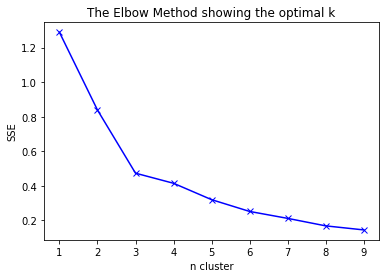

In [34]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

sse = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_class)
    kmeanModel.fit(X_class)
    sse.append(sum(np.min(cdist(X_class, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_class.shape[0])

# Plot elbow
plt.plot(K, sse, 'bx-')
plt.xlabel('n cluster')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

dari graph diatas, dapat dilihat bahwa nilai terbaik berada pada angka 3. Oleh karena itu, n_clusters yang digunakan dalam KMeans adalah 3

In [35]:
X_class = np.array(df.ix[:, 2:8])
y_class = np.array(df['Stock'])
k_mean = KMeans(n_clusters = 3)

k_mean_model = k_mean.fit(X_class)
labels = k_mean_model.labels_
centers = k_mean_model.cluster_centers_

y_pred = k_mean_model.predict(X_class)
pred_df = pd.DataFrame({'labels': y_pred, 'stock': df.ix[:, 0]})

C:\Users\Arby\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Arby\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\Arby\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-index

In [36]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, labels, test_size=0.2, random_state=42)

label_pred = k_mean_model.predict(X_test_class)

print ("Accuracy of K_Means ", accuracy_score(y_test_class, label_pred))

Accuracy of K_Means  1.0


Hasil prediksi stock ke dalam 3 kelas (0-2):

In [37]:
pred_df.sort_values('labels')

,labels,stock
25,0,CAT
23,0,CVX
17,0,IBM
14,1,JPM
26,1,BAC
24,1,CSCO
21,1,DIS
20,1,GE
19,1,HD
16,1,INTC


Interpret clustering dengan menggunakan PCA:

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X_class)

Hasil interpret (dibandingkan dengan real data):

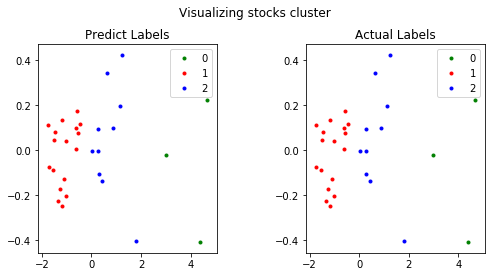

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
fig.suptitle('Visualizing stocks cluster')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Predict Labels')
ax2.set_title('Actual Labels')

for i in range(len(y_pred)):
    if y_pred[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1], c='g', marker='.')
    if y_pred[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1], c='r', marker='.')
    if y_pred[i] == 2:
        c3 = ax1.scatter(bc_pca[i,0], bc_pca[i,1], c='b', marker='.')    
    
    if labels[i] == 0:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1], c='g', marker='.')
    if labels[i] == 1:
        c5 = ax2.scatter(bc_pca[i,0], bc_pca[i,1], c='r', marker='.')
    if labels[i] == 2:
        c6 = ax2.scatter(bc_pca[i,0], bc_pca[i,1], c='b', marker='.')

l1 = ax1.legend([c1, c2, c3], ['0', '1', '2'])
l2 = ax2.legend([c4, c5, c6], ['0', '1', '2'])

Dari gambar tersebut, kita dapat dengan jelas melihat bahwa pengelompokan telah bekerja dengan sangat baik dan itu terlihat
pemisahan yang berbeda antara cluster dengan label 0, 1, dan 2. Hasilnya juga sangat mirip dengan label sebenarnya. Hal ini disebabkan, pada langkah ini, kami menggunakan KMeans untuk mengklasifikasikan data yang belum diberikan label menjadi data yang berlabel, oleh sebab itu, maka akurasinya (jika dilihat dari hasil visualisasi diatas) adalah 100%. Tujuan dari KMeans ini murni untuk mengklasifikasikan data yang belum diberikan label menjadi data yang berlabel untuk tujuan diversifikasi stock

Dari hasil yang didapat, kmeans memiliki akurasi yang lebih tinggi dibandingkan dengan knn.

# FUTURE PREDICT BERDASARKAN STOCK YANG DIINPUT USER
Dalam function ini, akan diprediksi harga closing price dari sebuah stock di waktu yang mendatang. Kami menggunakan linear regression untuk melakukan prediksinya.

In [40]:
import math
from sklearn import preprocessing
from matplotlib import style

def future_predict():
    stock_name =  data['stock'] == stock_customer
    data_DIS = data[stock_name]
    data_DIS = data_DIS.set_index("date")
    
    df = data_DIS[['close']]
    forecast_col = 'close'
    df.fillna(value=-99999, inplace=True)
    forecast_out = int(math.ceil(0.25 * len(df)))
    df['label'] = df[forecast_col].shift(-forecast_out)
    
    X = np.array(df.drop(['label'], 1))
    X = preprocessing.scale(X)
    X_lately = X[-forecast_out:]
    X = X[:-forecast_out]

    df.dropna(inplace=True)

    y = np.array(df['label'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LinearRegression(n_jobs=-1)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    
    forecast_set = clf.predict(X_lately)
    
    style.use('ggplot')
    df['Forecast'] = np.nan
    
    last_date = df.iloc[-1].name
    last_date = datetime.datetime.strptime(str(last_date), '%Y%m%d')
    last_unix = last_date.timestamp()
    one_week = 86400*7
    next_unix = last_unix + one_week
    
    for i in forecast_set:
        next_date = datetime.datetime.fromtimestamp(next_unix)
        next_unix += 86400*7
        df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    
    df['close'].plot()
    df['Forecast'].plot()

    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()
    
    predictPrice = df.tail(7)
    predictPrice.index =  pd.to_datetime(predictPrice.index).strftime('%d-%m-%Y')
    

    predictPrice = predictPrice.drop(columns=['close', 'label'])
    print(predictPrice)

# Testing
Melakukan simulasi jika digunakan oleh investor. Langkah yang diambil sebagai berikut:

a. Misalkan, investor tertarik untuk berinvestasi pada saham tertentu

In [41]:
# Input 
stock_customer = input("Enter the stock name customer is interested in buying(we will use clustering) ? ")
print(stock_customer)

Enter the stock name customer is interested in buying(we will use clustering) ? JPM
JPM


b. Dari nama stock yang diinput user, akan ditunjukkan cluster dari stock tersebut

In [42]:
# Dengan Clustering
customer_stock_model,stock_modified = linearModel(stock_customer)
temp = np.delete(customer_stock_model.coef_, 3)

customer_stock_class_pred = k_mean_model.predict([temp])

In [43]:
print("Cluster for customer Stock",stock_customer, " is          :",customer_stock_class_pred)

Cluster for customer Stock JPM  is          : [1]


In [44]:
#Cluster dari stocks
pred_df[pred_df['stock'] == stock_customer]

,labels,stock
14,1,JPM


c. Menampilkan closing price dari stock di masa yang akan datang

C:\Users\Arby\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
C:\Users\Arby\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Arby\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Arby\Anaconda3\lib\site-p

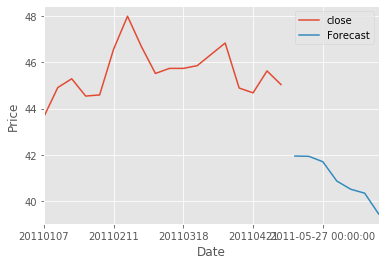

             Forecast
13-05-2011  41.942597
20-05-2011  41.928886
27-05-2011  41.695784
03-06-2011  40.859361
10-06-2011  40.502853
17-06-2011  40.331455
24-06-2011  39.433329


In [45]:
future_predict()

d. Hasil akurasi dari klasifikasi yang dilakukan

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
stock = pred_df.apply(le.fit_transform)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(stock['labels'], y_pred)

1.0

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(stock['labels'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Berarti, untuk investasi berikutnya, investor dapat membeli saham dari cluster yang berbeda untuk mencapai konsep diversifikasi saham dengan tujuan mengurangi resiko kegagalan. List cluster saham sebagai berikut:

In [49]:
pred_df.sort_values('labels')

,labels,stock
25,0,CAT
23,0,CVX
17,0,IBM
14,1,JPM
26,1,BAC
24,1,CSCO
21,1,DIS
20,1,GE
19,1,HD
16,1,INTC
